In [3]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
IMAGE_SIZE = 128
BATCH_SIZE = 32

In [6]:
def load_dataset():
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "train",
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )
    return dataset

# Load the dataset
dataset = load_dataset()

# Extract class names and verify
class_names = dataset.class_names
print("Class names:", class_names)

Found 70295 files belonging to 38 classes.


2024-04-07 19:05:02.449781: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22107 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:81:00.0, compute capability: 8.9
2024-04-07 19:05:02.855209: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

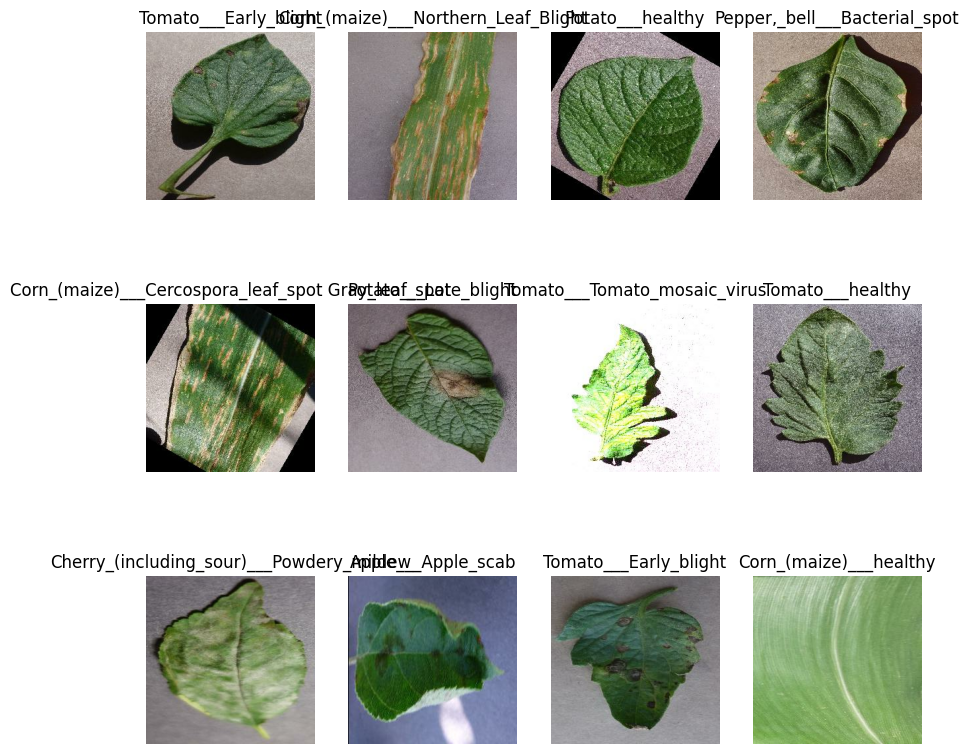

Labels: [ 9 36 11  1 31 19  2  6  1 15 34 34  6 27 26  6  6 12  6 11 37  7  0  4
  9 25 23 15 22  1 27 25]


In [7]:
# Function to visualize dataset samples
def visualize_dataset(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(12):
            ax = plt.subplot(3, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

# Visualize a few samples from the dataset
visualize_dataset(dataset)

# Function to verify label extraction
def verify_labels(dataset):
    for images, labels in dataset.take(1):
        print("Labels:", labels.numpy())

# Verify label extraction
verify_labels(dataset)

In [ ]:
40-30-30
50-25-25
60-20-20
70-15-15
80-10-10

In [44]:
# Split the dataset into train, validation, and test sets
train_ds40 = dataset.take(int(0.4 * len(dataset)))
val_ds40 = dataset.skip(int(0.4 * len(dataset))).take(int(0.3 * len(dataset)))
test_ds40 = dataset.skip(int(0.4 * len(dataset))).skip(int(0.3 * len(dataset)))

# Prepare the datasets for training
train_ds40 = train_ds40.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds40 = val_ds40.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds40 = test_ds40.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
# Split the dataset into train, validation, and test sets
train_ds50 = dataset.take(int(0.5 * len(dataset)))
val_ds50 = dataset.skip(int(0.5 * len(dataset))).take(int(0.25 * len(dataset)))
test_ds50 = dataset.skip(int(0.5 * len(dataset))).skip(int(0.25 * len(dataset)))

# Prepare the datasets for training
train_ds50 = train_ds50.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds50 = val_ds50.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds50 = test_ds50.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
# Split the dataset into train, validation, and test sets
train_ds60 = dataset.take(int(0.6 * len(dataset)))
val_ds60 = dataset.skip(int(0.6 * len(dataset))).take(int(0.2 * len(dataset)))
test_ds60 = dataset.skip(int(0.6 * len(dataset))).skip(int(0.2 * len(dataset)))

# Prepare the datasets for training
train_ds40 = train_ds60.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds40 = val_ds60.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds40 = test_ds60.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
# Split the dataset into train, validation, and test sets
train_ds70 = dataset.take(int(0.7 * len(dataset)))
val_ds70 = dataset.skip(int(0.7 * len(dataset))).take(int(0.15 * len(dataset)))
test_ds70 = dataset.skip(int(0.7 * len(dataset))).skip(int(0.15 * len(dataset)))

# Prepare the datasets for training
train_ds70 = train_ds70.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds70 = val_ds70.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds70 = test_ds70.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
# Split the dataset into train, validation, and test sets
train_ds80 = dataset.take(int(0.8 * len(dataset)))
val_ds80 = dataset.skip(int(0.8 * len(dataset))).take(int(0.1 * len(dataset)))
test_ds80 = dataset.skip(int(0.8 * len(dataset))).skip(int(0.1 * len(dataset)))

# Prepare the datasets for training
train_ds80 = train_ds80.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds80 = val_ds80.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds80 = test_ds80.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
model_dep = tf.keras.models.Sequential()

model_dep.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model_dep.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model_dep.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))  

model_dep.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model_dep.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model_dep.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model_dep.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_dep.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model_dep.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model_dep.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model_dep.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model_dep.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model_dep.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model_dep.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model_dep.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model_dep.add(tf.keras.layers.Dropout(0.25))
model_dep.add(tf.keras.layers.Flatten())
model_dep.add(tf.keras.layers.Dense(units=1500,activation='relu'))

model_dep.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

#Output Layer
model_dep.add(tf.keras.layers.Dense(units=38,activation='softmax'))


model_dep.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model_dep.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 conv2d_125 (Conv2D)         (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, 63, 63, 64)        18496     
                                                                 
 conv2d_127 (Conv2D)         (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                               

In [12]:
history_1 = model_dep.fit(
    train_ds40,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds40
)

Epoch 1/20


2024-04-07 15:17:19.149237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2024-04-07 15:17:19.803454: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-07 15:17:21.531856: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f938cb890b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-07 15:17:21.531885: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-07 15:17:21.536683: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-07 15:17:21.661718: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


878/878 [==============================] - 57s 47ms/step - loss: 2.8831 - accuracy: 0.1886 - val_loss: 1.6677 - val_accuracy: 0.5032
Epoch 2/20
878/878 [==============================] - 32s 36ms/step - loss: 1.2045 - accuracy: 0.6299 - val_loss: 0.8054 - val_accuracy: 0.7462
Epoch 3/20
878/878 [==============================] - 32s 36ms/step - loss: 0.6896 - accuracy: 0.7863 - val_loss: 0.4837 - val_accuracy: 0.8469
Epoch 4/20
878/878 [==============================] - 32s 36ms/step - loss: 0.4552 - accuracy: 0.8583 - val_loss: 0.4044 - val_accuracy: 0.8683
Epoch 5/20
878/878 [==============================] - 32s 36ms/step - loss: 0.3248 - accuracy: 0.8918 - val_loss: 0.4073 - val_accuracy: 0.8668
Epoch 6/20
878/878 [==============================] - 32s 36ms/step - loss: 0.2528 - accuracy: 0.9156 - val_loss: 0.3366 - val_accuracy: 0.8938
Epoch 7/20
878/878 [==============================] - 32s 36ms/step - loss: 0.1966 - accuracy: 0.9334 - val_loss: 0.2898 - val_accuracy: 0.9072
Epo

2024-04-07 15:28:36.067558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:27: Filling up shuffle buffer (this may take a while): 1 of 1000


1/1 [==============================] - 0s 131ms/step


2024-04-07 15:28:41.562706: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


1/1 [==============================] - 0s 24ms/step
Precision: 0.9472786698877362
Recall: 0.9472786698877362
Accuracy: 0.9472786698877362


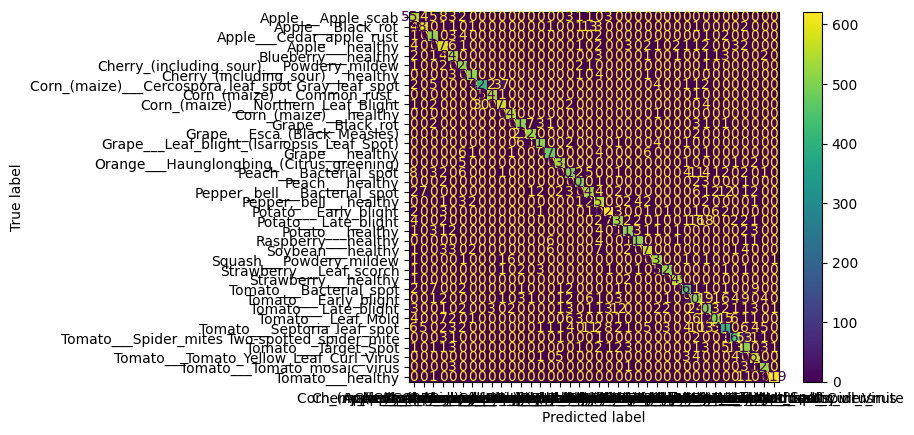

In [13]:
# Load your test dataset
test_ds = test_ds40

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision40_20e = precision_score(labels, predictions, average='micro')
recall40_20e = recall_score(labels, predictions, average='micro')
accuracy40_20e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision40_20e)
print("Recall:", recall40_20e)
print("Accuracy:", accuracy40_20e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()


In [14]:
history_2 = model_dep.fit(
    train_ds40,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds40
)

Epoch 1/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0482 - accuracy: 0.9837 - val_loss: 0.2417 - val_accuracy: 0.9394
Epoch 2/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.2697 - val_accuracy: 0.9335
Epoch 3/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0407 - accuracy: 0.9860 - val_loss: 0.3833 - val_accuracy: 0.9053
Epoch 4/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.2467 - val_accuracy: 0.9376
Epoch 5/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.3412 - val_accuracy: 0.9243
Epoch 6/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.2474 - val_accuracy: 0.9387
Epoch 7/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.2597 - val_accuracy:

1/1 [==============================] - 0s 25ms/step
Precision: 0.9483207806356876
Recall: 0.9472786698877362
Accuracy: 0.9483207806356876


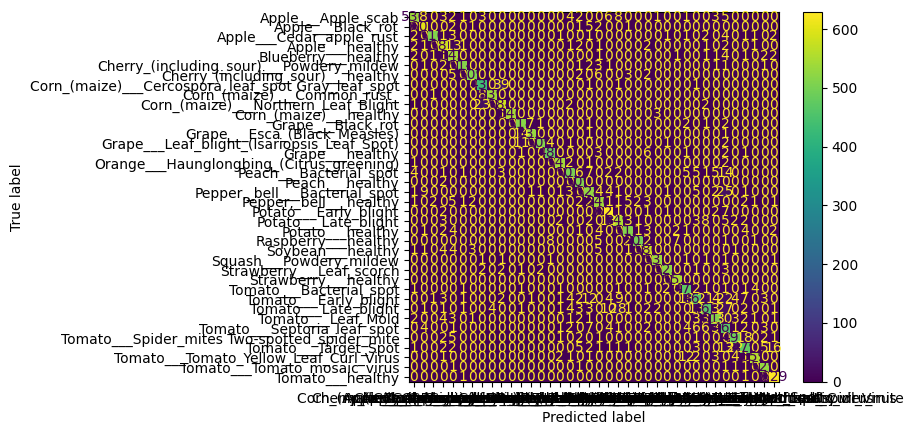

In [15]:
# Load your test dataset
test_ds = test_ds40

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision40_40e = precision_score(labels, predictions, average='micro')
recall40_40e = recall_score(labels, predictions, average='micro')
accuracy40_40e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision40_40e)
print("Recall:", recall40_20e)
print("Accuracy:", accuracy40_40e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [16]:
history_3 = model_dep.fit(
    train_ds40,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds40
)

Epoch 1/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.2531 - val_accuracy: 0.9422
Epoch 2/20
878/878 [==============================] - 31s 36ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.2389 - val_accuracy: 0.9464
Epoch 3/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.2750 - val_accuracy: 0.9408
Epoch 4/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.2370 - val_accuracy: 0.9450
Epoch 5/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.2675 - val_accuracy: 0.9446
Epoch 6/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.2626 - val_accuracy: 0.9439
Epoch 7/20
878/878 [==============================] - 31s 36ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.2480 - val_accuracy:

1/1 [==============================] - 0s 25ms/step
Precision: 0.9477523565913505
Recall: 0.9477523565913505
Accuracy: 0.9477523565913505


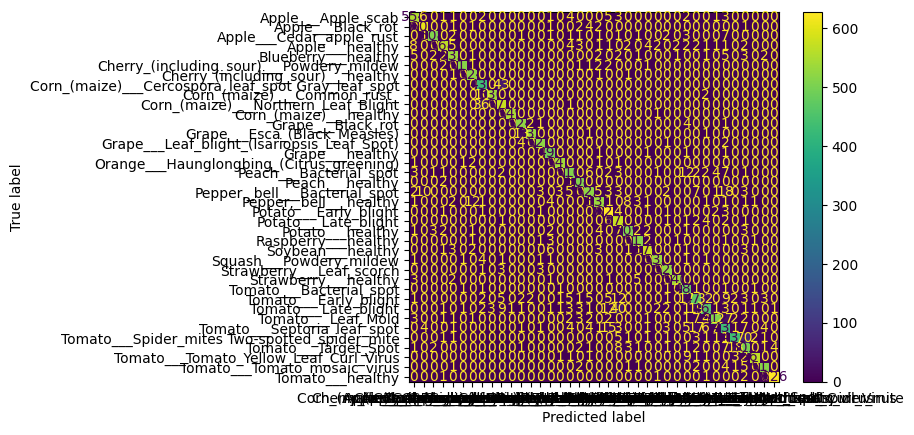

In [17]:
# Load your test dataset
test_ds = test_ds40

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision40_60e = precision_score(labels, predictions, average='micro')
recall40_60e = recall_score(labels, predictions, average='micro')
accuracy40_60e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision40_60e)
print("Recall:", recall40_60e)
print("Accuracy:", accuracy40_60e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [18]:
history_4 = model_dep.fit(
    train_ds40,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds40
)

Epoch 1/20
878/878 [==============================] - 31s 36ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.2241 - val_accuracy: 0.9530
Epoch 2/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.2843 - val_accuracy: 0.9452
Epoch 3/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.2641 - val_accuracy: 0.9504
Epoch 4/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.2719 - val_accuracy: 0.9451
Epoch 5/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.2462 - val_accuracy: 0.9473
Epoch 6/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.3120 - val_accuracy: 0.9416
Epoch 7/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.2639 - val_accuracy:

1/1 [==============================] - 0s 24ms/step
Precision: 0.9469944578655677
Recall: 0.9469944578655677
Accuracy: 0.9469944578655677


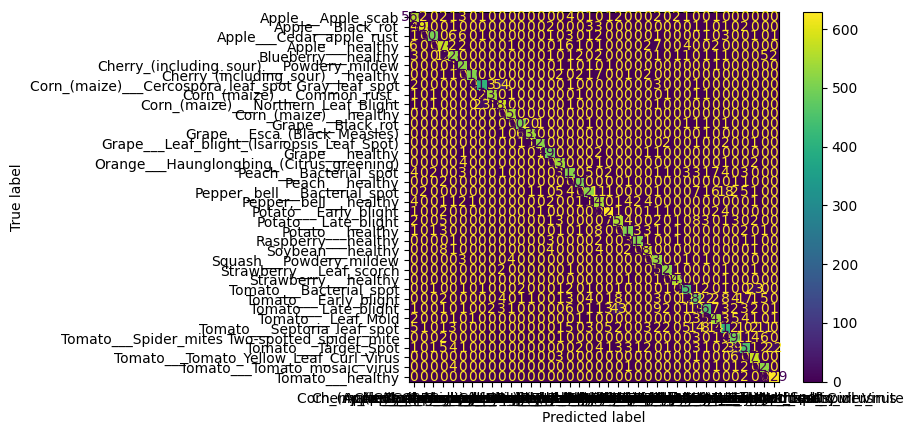

In [19]:
# Load your test dataset
test_ds = test_ds40

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision40_80e = precision_score(labels, predictions, average='micro')
recall40_80e = recall_score(labels, predictions, average='micro')
accuracy40_80e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision40_80e)
print("Recall:", recall40_80e)
print("Accuracy:", accuracy40_80e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [20]:
history_5 = model_dep.fit(
    train_ds40,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds40
)

Epoch 1/20
878/878 [==============================] - 31s 36ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.2451 - val_accuracy: 0.9501
Epoch 2/20
878/878 [==============================] - 31s 36ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.3595 - val_accuracy: 0.9366
Epoch 3/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.2400 - val_accuracy: 0.9550
Epoch 4/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.4152 - val_accuracy: 0.9282
Epoch 5/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.2999 - val_accuracy: 0.9471
Epoch 6/20
878/878 [==============================] - 32s 36ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.2659 - val_accuracy: 0.9540
Epoch 7/20
878/878 [==============================] - 31s 36ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.3487 - val_accuracy:

1/1 [==============================] - 0s 24ms/step
Precision: 0.9441997063142438
Recall: 0.9441997063142438
Accuracy: 0.9441997063142438


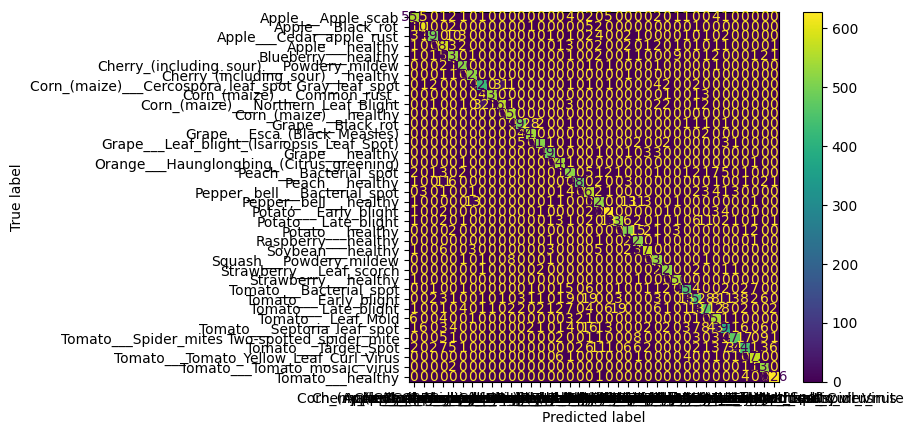

In [21]:
# Load your test dataset
test_ds = test_ds40

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision40_100e = precision_score(labels, predictions, average='micro')
recall40_100e = recall_score(labels, predictions, average='micro')
accuracy40_100e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision40_100e)
print("Recall:", recall40_100e)
print("Accuracy:", accuracy40_100e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
************************

In [11]:
history_1_50 = model_dep.fit(
    train_ds50,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds50
)

Epoch 1/20


2024-04-07 16:19:13.656965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2024-04-07 16:19:14.310143: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-07 16:19:16.031646: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd9733404f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-07 16:19:16.031675: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-07 16:19:16.036375: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-07 16:19:16.160672: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1097/1098 [============================>.] - ETA: 0s - loss: 2.3679 - accuracy: 0.3243

2024-04-07 16:19:59.773139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:30: Filling up shuffle buffer (this may take a while): 427 of 1000
2024-04-07 16:20:00.799912: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


1098/1098 [==============================] - 64s 43ms/step - loss: 2.3670 - accuracy: 0.3245 - val_loss: 1.0756 - val_accuracy: 0.6701
Epoch 2/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.8878 - accuracy: 0.7229 - val_loss: 0.5539 - val_accuracy: 0.8221
Epoch 3/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.5408 - accuracy: 0.8277 - val_loss: 0.4740 - val_accuracy: 0.8488
Epoch 4/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.3702 - accuracy: 0.8790 - val_loss: 0.3775 - val_accuracy: 0.8775
Epoch 5/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.2743 - accuracy: 0.9092 - val_loss: 0.2828 - val_accuracy: 0.9110
Epoch 6/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.2104 - accuracy: 0.9302 - val_loss: 0.2405 - val_accuracy: 0.9228
Epoch 7/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.1697 - accuracy: 0.9433 - val_loss: 0.2477 - val_accura

2024-04-07 16:32:35.589474: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:33: Filling up shuffle buffer (this may take a while): 1 of 1000


1/1 [==============================] - 0s 132ms/step


2024-04-07 16:32:40.122668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


1/1 [==============================] - 0s 25ms/step
Precision: 0.9443465408447501
Recall: 0.9443465408447501
Accuracy: 0.9443465408447501


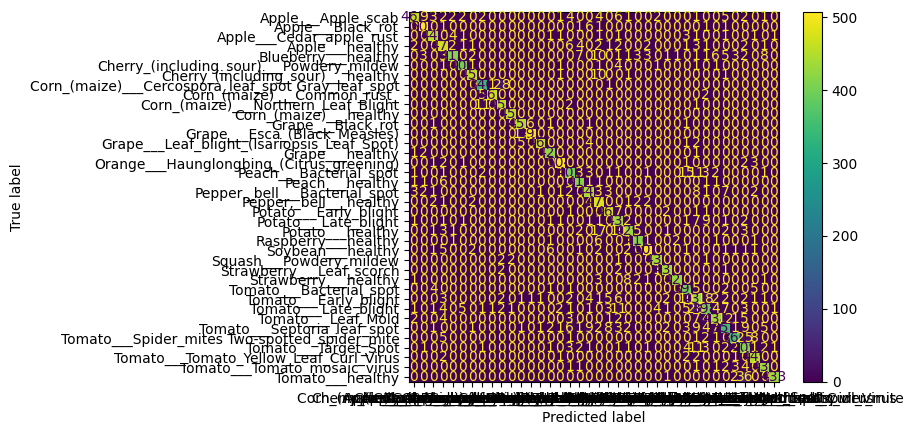

In [12]:
# Load your test dataset
test_ds = test_ds50

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision50_20e = precision_score(labels, predictions, average='micro')
recall50_20e = recall_score(labels, predictions, average='micro')
accuracy50_20e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision50_20e)
print("Recall:", recall50_20e)
print("Accuracy:", accuracy50_20e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [13]:
history_2_50 = model_dep.fit(
    train_ds50,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds50
)

Epoch 1/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0384 - accuracy: 0.9871 - val_loss: 0.3070 - val_accuracy: 0.9274
Epoch 2/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.3289 - val_accuracy: 0.9250
Epoch 3/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.2309 - val_accuracy: 0.9411
Epoch 4/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.2260 - val_accuracy: 0.9459
Epoch 5/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.2433 - val_accuracy: 0.9398
Epoch 6/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.2555 - val_accuracy: 0.9310
Epoch 7/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.2825 -

1/1 [==============================] - 0s 25ms/step
Precision: 0.9549201296117332
Recall: 0.9549201296117332
Accuracy: 0.9549201296117332


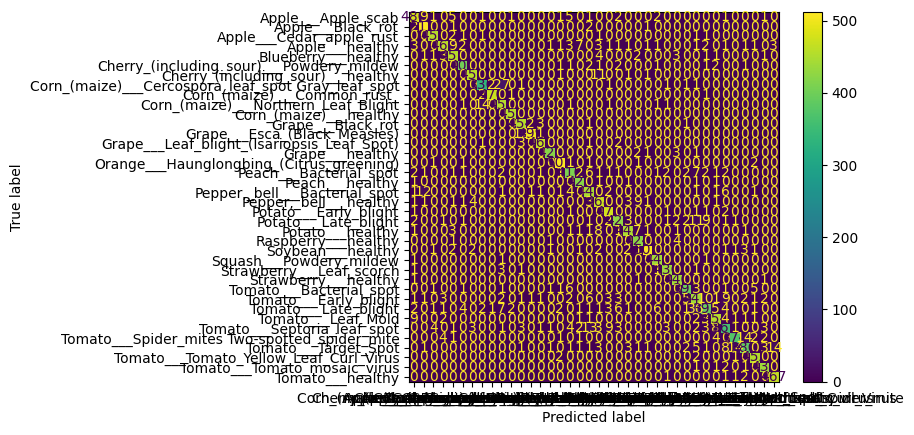

In [14]:
# Load your test dataset
test_ds = test_ds50

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision50_40e = precision_score(labels, predictions, average='micro')
recall50_40e = recall_score(labels, predictions, average='micro')
accuracy50_40e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision50_40e)
print("Recall:", recall50_40e)
print("Accuracy:", accuracy50_40e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [15]:
history_3_50 = model_dep.fit(
    train_ds50,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds50
)

Epoch 1/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.2251 - val_accuracy: 0.9510
Epoch 2/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.2788 - val_accuracy: 0.9426
Epoch 3/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.2846 - val_accuracy: 0.9411
Epoch 4/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.2318 - val_accuracy: 0.9512
Epoch 5/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.2854 - val_accuracy: 0.9373
Epoch 6/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.2196 - val_accuracy: 0.9512
Epoch 7/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.2598 -

1/1 [==============================] - 0s 25ms/step
Precision: 0.952418850548576
Recall: 0.952418850548576
Accuracy: 0.952418850548576


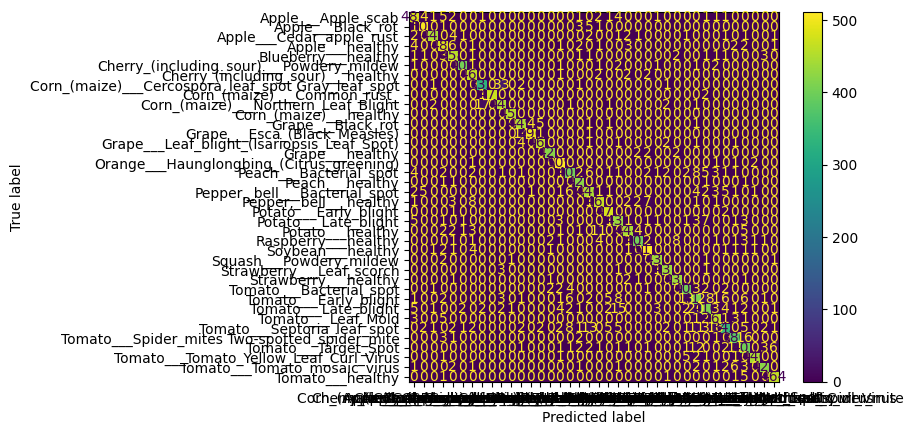

In [16]:
# Load your test dataset
test_ds = test_ds50

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision50_60e = precision_score(labels, predictions, average='micro')
recall50_60e = recall_score(labels, predictions, average='micro')
accuracy50_60e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision50_60e)
print("Recall:", recall50_60e)
print("Accuracy:", accuracy50_60e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [17]:
history_4_50 = model_dep.fit(
    train_ds50,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds50
)

Epoch 1/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.2709 - val_accuracy: 0.9488
Epoch 2/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.2487 - val_accuracy: 0.9493
Epoch 3/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.1942 - val_accuracy: 0.9598
Epoch 4/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0152 - accuracy: 0.9959 - val_loss: 0.2703 - val_accuracy: 0.9446
Epoch 5/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.2366 - val_accuracy: 0.9559
Epoch 6/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0191 - accuracy: 0.9946 - val_loss: 0.2955 - val_accuracy: 0.9413
Epoch 7/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.2659 -

1/1 [==============================] - 0s 29ms/step
Precision: 0.9405377749985788
Recall: 0.9405377749985788
Accuracy: 0.9405377749985788


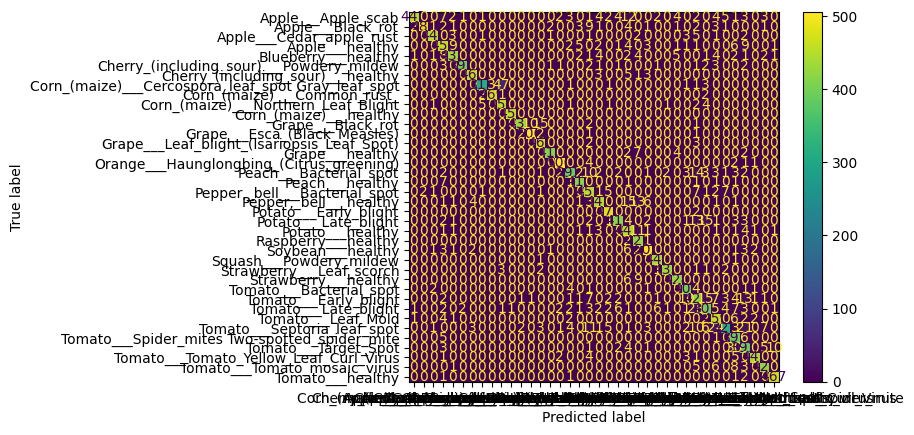

In [18]:
# Load your test dataset
test_ds = test_ds50

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision50_80e = precision_score(labels, predictions, average='micro')
recall50_80e = recall_score(labels, predictions, average='micro')
accuracy50_80e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision50_80e)
print("Recall:", recall50_80e)
print("Accuracy:", accuracy50_80e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [19]:
history_5_50 = model_dep.fit(
    train_ds50,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds50
)

Epoch 1/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.2499 - val_accuracy: 0.9537
Epoch 2/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.2448 - val_accuracy: 0.9585
Epoch 3/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.1961 - val_accuracy: 0.9635
Epoch 4/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.2694 - val_accuracy: 0.9498
Epoch 5/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.2571 - val_accuracy: 0.9496
Epoch 6/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.2823 - val_accuracy: 0.9508
Epoch 7/20
1098/1098 [==============================] - 36s 33ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.3246 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.955318060371781
Recall: 0.955318060371781
Accuracy: 0.955318060371781


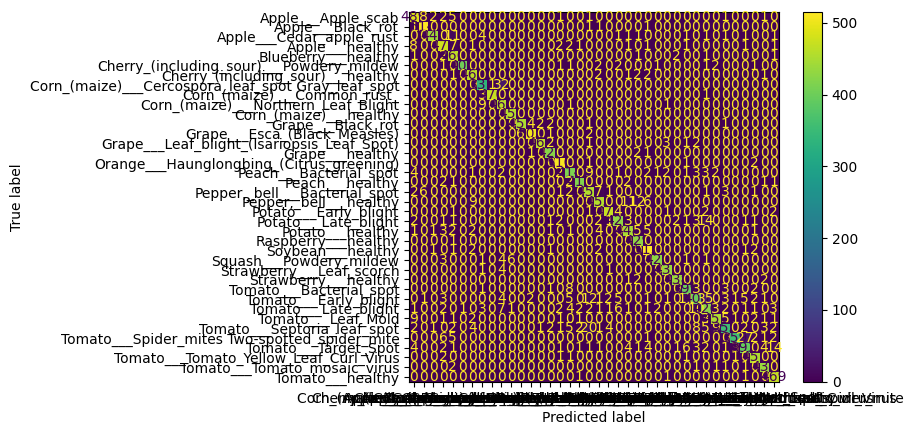

In [20]:
# Load your test dataset
test_ds = test_ds50

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision50_100e = precision_score(labels, predictions, average='micro')
recall50_100e = recall_score(labels, predictions, average='micro')
accuracy50_100e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision50_100e)
print("Recall:", recall50_100e)
print("Accuracy:", accuracy50_100e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
//////////////////////////////////

In [29]:
history_1_60 = model_dep.fit(
    train_ds60,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds60
)

Epoch 1/20
1318/1318 [==============================] - 54s 39ms/step - loss: 2.2821 - accuracy: 0.3460 - val_loss: 1.0171 - val_accuracy: 0.6847
Epoch 2/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.7306 - accuracy: 0.7687 - val_loss: 0.4750 - val_accuracy: 0.8472
Epoch 3/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.4057 - accuracy: 0.8700 - val_loss: 0.3277 - val_accuracy: 0.8937
Epoch 4/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.2831 - accuracy: 0.9078 - val_loss: 0.2681 - val_accuracy: 0.9150
Epoch 5/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.2088 - accuracy: 0.9302 - val_loss: 0.2466 - val_accuracy: 0.9220
Epoch 6/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.1612 - accuracy: 0.9463 - val_loss: 0.2808 - val_accuracy: 0.9154
Epoch 7/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.1365 - accuracy: 0.9543 - val_loss: 0.1781 -

1/1 [==============================] - 0s 111ms/step
Precision: 0.9579987207732216
Recall: 0.9579987207732216
Accuracy: 0.9579987207732216


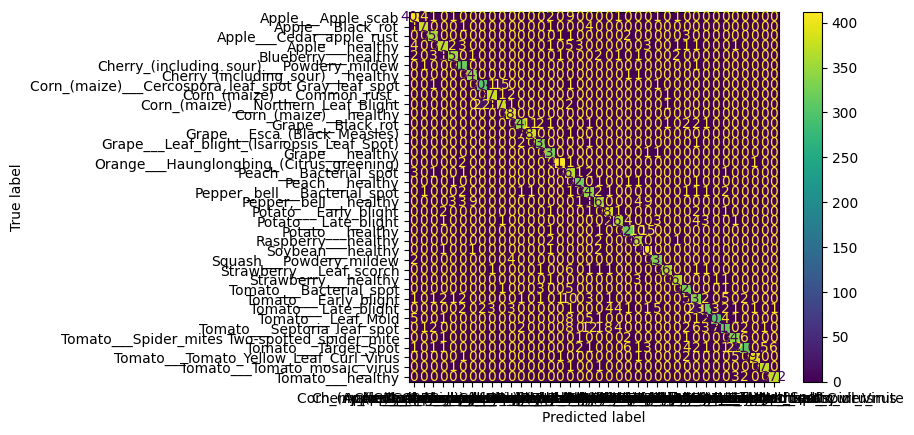

In [30]:
# Load your test dataset
test_ds = test_ds60

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision60_20e = precision_score(labels, predictions, average='micro')
recall60_20e = recall_score(labels, predictions, average='micro')
accuracy60_20e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision60_20e)
print("Recall:", recall60_20e)
print("Accuracy:", accuracy60_20e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [31]:
history_2_60 = model_dep.fit(
    train_ds60,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds60
)

Epoch 1/20
1318/1318 [==============================] - 52s 39ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.2113 - val_accuracy: 0.9552
Epoch 2/20
1318/1318 [==============================] - 51s 39ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.1830 - val_accuracy: 0.9517
Epoch 3/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.1788 - val_accuracy: 0.9547
Epoch 4/20
1318/1318 [==============================] - 51s 39ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.1510 - val_accuracy: 0.9640
Epoch 5/20
1318/1318 [==============================] - 51s 39ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.1748 - val_accuracy: 0.9580
Epoch 6/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.1863 - val_accuracy: 0.9552
Epoch 7/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.1598 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9631156278871438
Recall: 0.9631156278871438
Accuracy: 0.9631156278871438


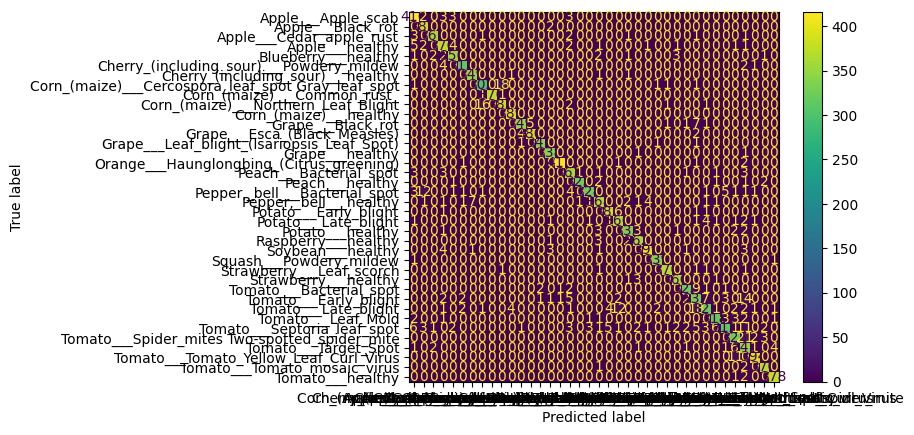

In [32]:
# Load your test dataset
test_ds = test_ds60

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision60_40e = precision_score(labels, predictions, average='micro')
recall60_40e = recall_score(labels, predictions, average='micro')
accuracy60_40e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision60_40e)
print("Recall:", recall60_40e)
print("Accuracy:", accuracy60_40e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [33]:
history_3_60 = model_dep.fit(
    train_ds60,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds60
)

Epoch 1/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.1514 - val_accuracy: 0.9669
Epoch 2/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.2362 - val_accuracy: 0.9503
Epoch 3/20
1318/1318 [==============================] - 50s 38ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.2076 - val_accuracy: 0.9551
Epoch 4/20
1318/1318 [==============================] - 51s 39ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.1918 - val_accuracy: 0.9592
Epoch 5/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.1621 - val_accuracy: 0.9670
Epoch 6/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.1743 - val_accuracy: 0.9634
Epoch 7/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.1813 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9688010802359462
Recall: 0.9688010802359462
Accuracy: 0.9688010802359462


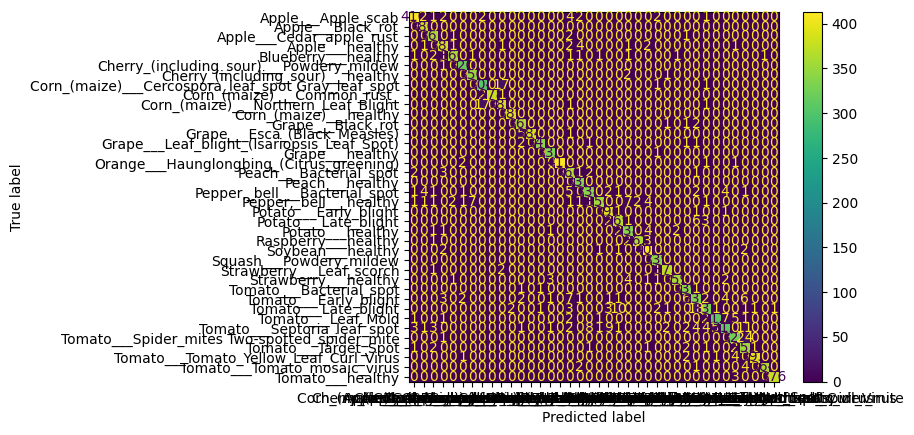

In [34]:
# Load your test dataset
test_ds = test_ds60

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision60_60e = precision_score(labels, predictions, average='micro')
recall60_60e = recall_score(labels, predictions, average='micro')
accuracy60_60e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision60_60e)
print("Recall:", recall60_60e)
print("Accuracy:", accuracy60_60e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [35]:
history_4_60 = model_dep.fit(
    train_ds60,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds60
)

Epoch 1/20
1318/1318 [==============================] - 50s 38ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.1360 - val_accuracy: 0.9725
Epoch 2/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.2134 - val_accuracy: 0.9577
Epoch 3/20
1318/1318 [==============================] - 50s 38ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.1642 - val_accuracy: 0.9655
Epoch 4/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.3186 - val_accuracy: 0.9396
Epoch 5/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.1444 - val_accuracy: 0.9692
Epoch 6/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.1848 - val_accuracy: 0.9641
Epoch 7/20
1318/1318 [==============================] - 51s 39ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.1460 -

1/1 [==============================] - 0s 23ms/step
Precision: 0.9723544879539479
Recall: 0.9723544879539479
Accuracy: 0.9723544879539479


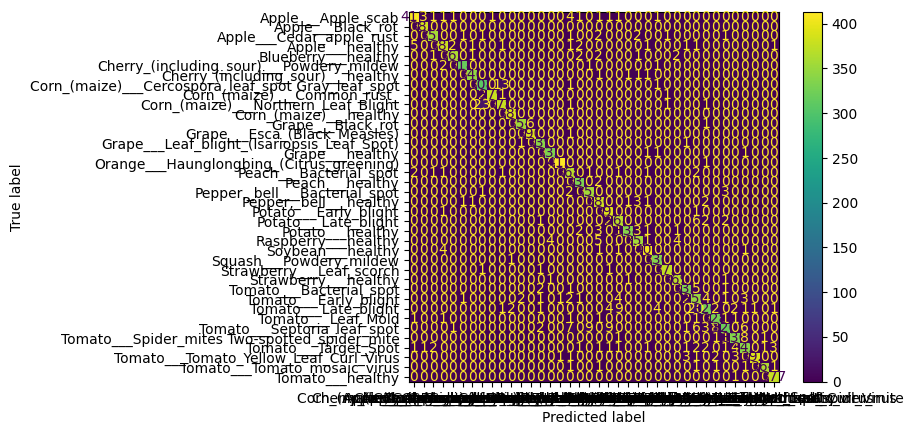

In [36]:
# Load your test dataset
test_ds = test_ds60

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision60_80e = precision_score(labels, predictions, average='micro')
recall60_80e = recall_score(labels, predictions, average='micro')
accuracy60_80e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision60_80e)
print("Recall:", recall60_80e)
print("Accuracy:", accuracy60_80e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [37]:
history_5_60 = model_dep.fit(
    train_ds60,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds60
)

Epoch 1/20
1318/1318 [==============================] - 51s 39ms/step - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.1575 - val_accuracy: 0.9694
Epoch 2/20
1318/1318 [==============================] - 50s 38ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.1482 - val_accuracy: 0.9731
Epoch 3/20
1318/1318 [==============================] - 50s 38ms/step - loss: 0.0136 - accuracy: 0.9965 - val_loss: 0.1923 - val_accuracy: 0.9673
Epoch 4/20
1318/1318 [==============================] - 50s 38ms/step - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.2584 - val_accuracy: 0.9552
Epoch 5/20
1318/1318 [==============================] - 50s 38ms/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.2662 - val_accuracy: 0.9605
Epoch 6/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.1806 - val_accuracy: 0.9683
Epoch 7/20
1318/1318 [==============================] - 51s 38ms/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.1913 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9607703787932628
Recall: 0.9607703787932628
Accuracy: 0.9607703787932628


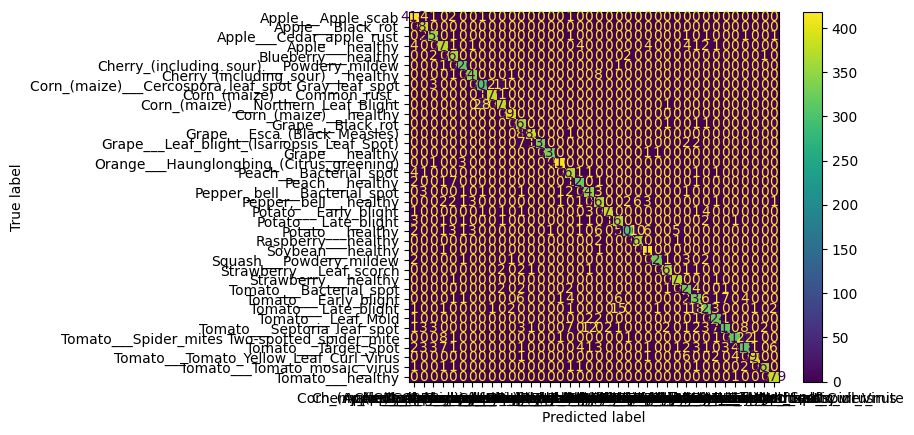

In [38]:
# Load your test dataset
test_ds = test_ds60

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision60_100e = precision_score(labels, predictions, average='micro')
recall60_100e = recall_score(labels, predictions, average='micro')
accuracy60_100e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision60_100e)
print("Recall:", recall60_100e)
print("Accuracy:", accuracy60_100e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
////////////////////////////

In [10]:
history_1_70 = model_dep.fit(
    train_ds70,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds70
)

Epoch 1/20


2024-04-07 19:06:04.920797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2024-04-07 19:06:05.573348: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-07 19:06:07.293058: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9ed583df80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-07 19:06:07.293086: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-07 19:06:07.297830: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-07 19:06:07.420955: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1537/1537 [==============================] - ETA: 0s - loss: 1.9465 - accuracy: 0.4364

2024-04-07 19:07:03.012686: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:20: Filling up shuffle buffer (this may take a while): 102 of 1000
2024-04-07 19:07:04.819501: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


1537/1537 [==============================] - 75s 38ms/step - loss: 1.9465 - accuracy: 0.4364 - val_loss: 0.7613 - val_accuracy: 0.7630
Epoch 2/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.6077 - accuracy: 0.8069 - val_loss: 0.4225 - val_accuracy: 0.8668
Epoch 3/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.3585 - accuracy: 0.8844 - val_loss: 0.2541 - val_accuracy: 0.9176
Epoch 4/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.2523 - accuracy: 0.9177 - val_loss: 0.2713 - val_accuracy: 0.9138
Epoch 5/20
1537/1537 [==============================] - 46s 30ms/step - loss: 0.1901 - accuracy: 0.9363 - val_loss: 0.3021 - val_accuracy: 0.9037
Epoch 6/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.1506 - accuracy: 0.9501 - val_loss: 0.1914 - val_accuracy: 0.9404
Epoch 7/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.1190 - accuracy: 0.9599 - val_loss: 0.2369 - val_accura

2024-04-07 19:21:52.233999: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 1 of 1000


1/1 [==============================] - 0s 131ms/step


2024-04-07 19:21:54.857748: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


1/1 [==============================] - 0s 25ms/step
Precision: 0.9707077388264197
Recall: 0.9707077388264197
Accuracy: 0.9707077388264197


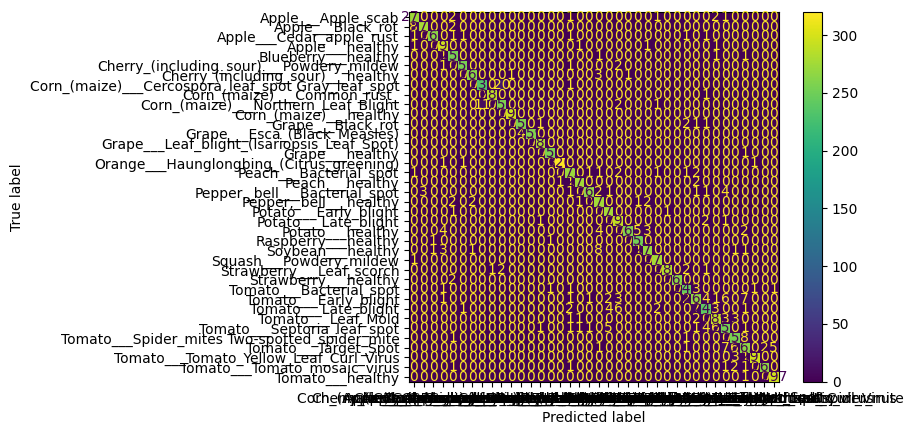

In [11]:
# Load your test dataset
test_ds = test_ds70

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision70_20e = precision_score(labels, predictions, average='micro')
recall70_20e = recall_score(labels, predictions, average='micro')
accuracy70_20e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision70_20e)
print("Recall:", recall70_20e)
print("Accuracy:", accuracy70_20e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [12]:
history_2_70 = model_dep.fit(
    train_ds70,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds70
)

Epoch 1/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.1588 - val_accuracy: 0.9645
Epoch 2/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.1751 - val_accuracy: 0.9612
Epoch 3/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 0.1535 - val_accuracy: 0.9634
Epoch 4/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.2159 - val_accuracy: 0.9483
Epoch 5/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.1854 - val_accuracy: 0.9555
Epoch 6/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.1452 - val_accuracy: 0.9668
Epoch 7/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.1687 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9695738448455069
Recall: 0.9695738448455069
Accuracy: 0.9695738448455069


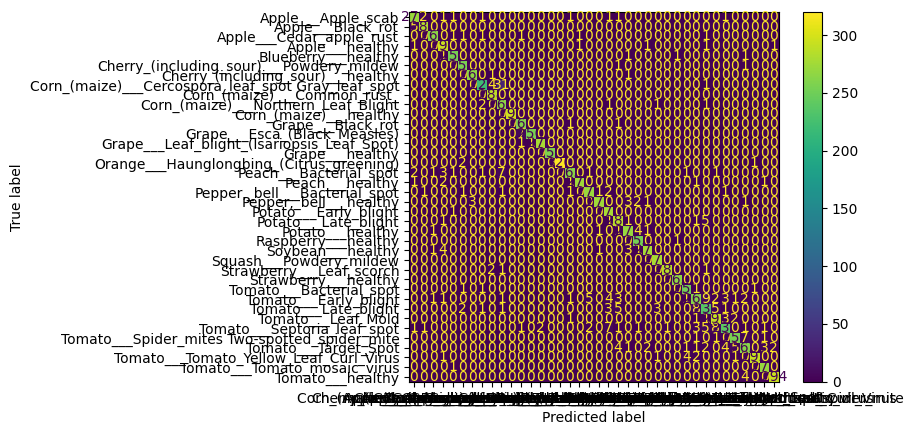

In [13]:
# Load your test dataset
test_ds = test_ds70

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision70_40e = precision_score(labels, predictions, average='micro')
recall70_40e = recall_score(labels, predictions, average='micro')
accuracy70_40e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision70_40e)
print("Recall:", recall70_40e)
print("Accuracy:", accuracy70_40e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [14]:
history_3_70 = model_dep.fit(
    train_ds70,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds70
)

Epoch 1/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 0.2003 - val_accuracy: 0.9568
Epoch 2/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.1469 - val_accuracy: 0.9723
Epoch 3/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.1817 - val_accuracy: 0.9648
Epoch 4/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.1550 - val_accuracy: 0.9687
Epoch 5/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 0.1789 - val_accuracy: 0.9663
Epoch 6/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.1483 - val_accuracy: 0.9708
Epoch 7/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.1579 -

1/1 [==============================] - 0s 25ms/step
Precision: 0.9691958801852026
Recall: 0.9691958801852026
Accuracy: 0.9691958801852026


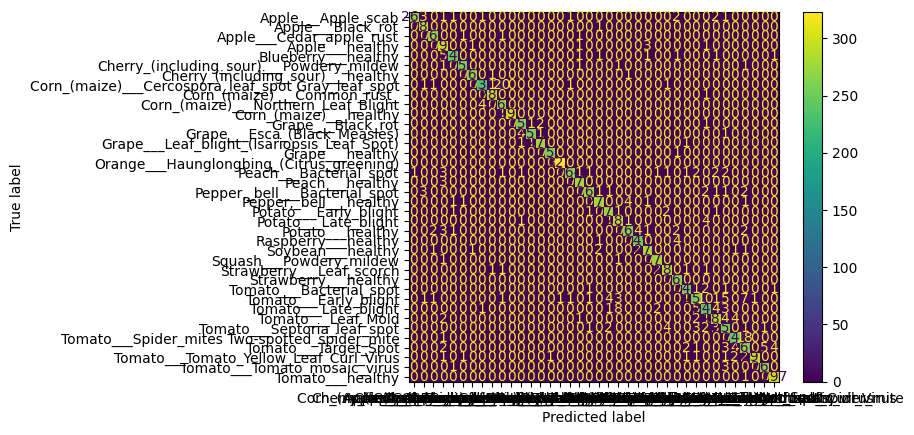

In [15]:
# Load your test dataset
test_ds = test_ds70

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision70_60e = precision_score(labels, predictions, average='micro')
recall70_60e = recall_score(labels, predictions, average='micro')
accuracy70_60e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision70_60e)
print("Recall:", recall70_60e)
print("Accuracy:", accuracy70_60e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [16]:
history_4_70 = model_dep.fit(
    train_ds70,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds70
)

Epoch 1/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.2424 - val_accuracy: 0.9571
Epoch 2/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.2080 - val_accuracy: 0.9619
Epoch 3/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.1904 - val_accuracy: 0.9631
Epoch 4/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.2054 - val_accuracy: 0.9639
Epoch 5/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0113 - accuracy: 0.9970 - val_loss: 0.1661 - val_accuracy: 0.9687
Epoch 6/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0102 - accuracy: 0.9976 - val_loss: 0.1586 - val_accuracy: 0.9672
Epoch 7/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0093 - accuracy: 0.9976 - val_loss: 0.1465 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9708967211565719
Recall: 0.9708967211565719
Accuracy: 0.9708967211565719


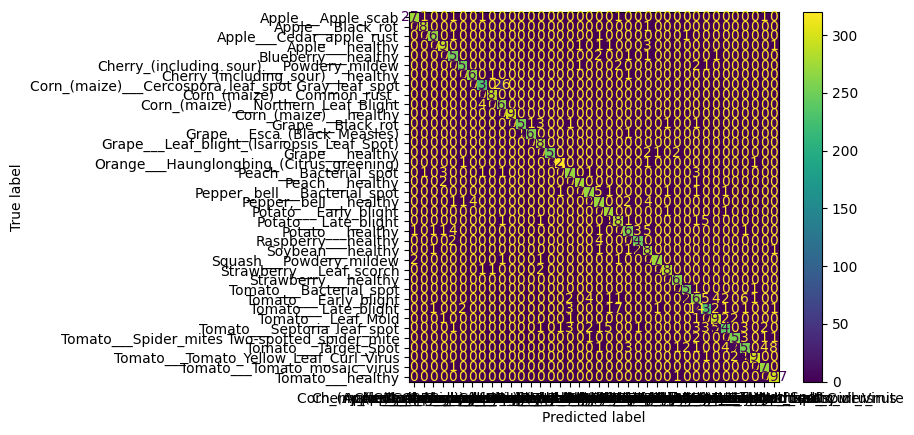

In [17]:
# Load your test dataset
test_ds = test_ds70

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision70_80e = precision_score(labels, predictions, average='micro')
recall70_80e = recall_score(labels, predictions, average='micro')
accuracy70_80e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision70_80e)
print("Recall:", recall70_80e)
print("Accuracy:", accuracy70_80e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [18]:
history_5_70 = model_dep.fit(
    train_ds70,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds70
)

Epoch 1/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.2769 - val_accuracy: 0.9630
Epoch 2/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0134 - accuracy: 0.9971 - val_loss: 0.1332 - val_accuracy: 0.9736
Epoch 3/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.2347 - val_accuracy: 0.9641
Epoch 4/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.2169 - val_accuracy: 0.9656
Epoch 5/20
1537/1537 [==============================] - 45s 30ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.1933 - val_accuracy: 0.9614
Epoch 6/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0092 - accuracy: 0.9976 - val_loss: 0.1974 - val_accuracy: 0.9684
Epoch 7/20
1537/1537 [==============================] - 45s 29ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.1837 -

1/1 [==============================] - 0s 25ms/step
Precision: 0.969668336010583
Recall: 0.969668336010583
Accuracy: 0.969668336010583


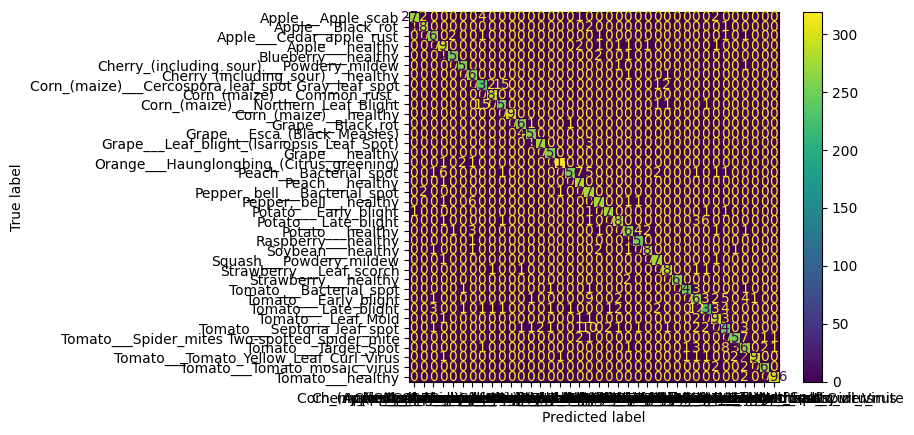

In [19]:
# Load your test dataset
test_ds = test_ds70

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision70_100e = precision_score(labels, predictions, average='micro')
recall70_100e = recall_score(labels, predictions, average='micro')
accuracy70_100e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision70_100e)
print("Recall:", recall70_100e)
print("Accuracy:", accuracy70_100e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
//////////////////////////////

In [9]:
history_1_80 = model_dep.fit(
    train_ds80,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds80
)

Epoch 1/20


2024-04-07 13:19:48.303797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2024-04-07 13:19:49.033106: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-07 13:19:50.772381: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6aadbf3f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-07 13:19:50.772407: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-07 13:19:50.777161: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-07 13:19:50.905927: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1757/1757 [==============================] - ETA: 0s - loss: 2.1008 - accuracy: 0.3964

2024-04-07 13:20:53.138638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:20: Filling up shuffle buffer (this may take a while): 69 of 1000
2024-04-07 13:20:54.334480: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


1757/1757 [==============================] - 79s 36ms/step - loss: 2.1008 - accuracy: 0.3964 - val_loss: 0.8083 - val_accuracy: 0.7510
Epoch 2/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.6084 - accuracy: 0.8047 - val_loss: 0.3664 - val_accuracy: 0.8816
Epoch 3/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.3516 - accuracy: 0.8857 - val_loss: 0.2952 - val_accuracy: 0.9028
Epoch 4/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.2370 - accuracy: 0.9218 - val_loss: 0.2032 - val_accuracy: 0.9378
Epoch 5/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.1735 - accuracy: 0.9421 - val_loss: 0.1781 - val_accuracy: 0.9439
Epoch 6/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.1449 - accuracy: 0.9520 - val_loss: 0.1613 - val_accuracy: 0.9522
Epoch 7/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.1131 - accuracy: 0.9622 - val_loss: 0.1567 - val_accura

2024-04-07 13:41:54.844054: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 1 of 1000


1/1 [==============================] - 0s 133ms/step


2024-04-07 13:41:56.656670: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


1/1 [==============================] - 0s 24ms/step
Precision: 0.9704091745717117
Recall: 0.9704091745717117
Accuracy: 0.9704091745717117


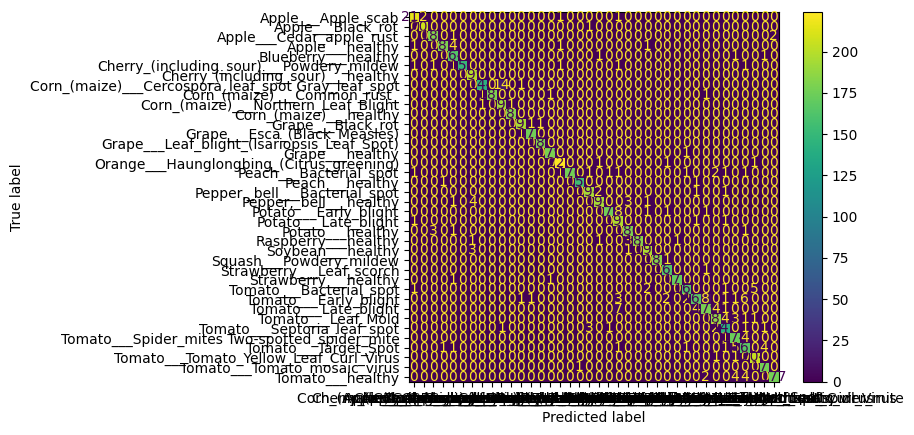

In [10]:
# Load your test dataset
test_ds = test_ds80

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision80_20e = precision_score(labels, predictions, average='micro')
recall80_20e = recall_score(labels, predictions, average='micro')
accuracy80_20e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision80_20e)
print("Recall:", recall80_20e)
print("Accuracy:", accuracy80_20e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [13]:
history_2_80 = model_dep.fit(
    train_ds80,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds80
)

Epoch 1/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0975 - val_accuracy: 0.9737
Epoch 2/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.1136 - val_accuracy: 0.9713
Epoch 3/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.1097 - val_accuracy: 0.9703
Epoch 4/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.1004 - val_accuracy: 0.9757
Epoch 5/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0941 - val_accuracy: 0.9773
Epoch 6/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.1233 - val_accuracy: 0.9663
Epoch 7/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.1140 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9733824154042192
Recall: 0.9733824154042192
Accuracy: 0.9733824154042192


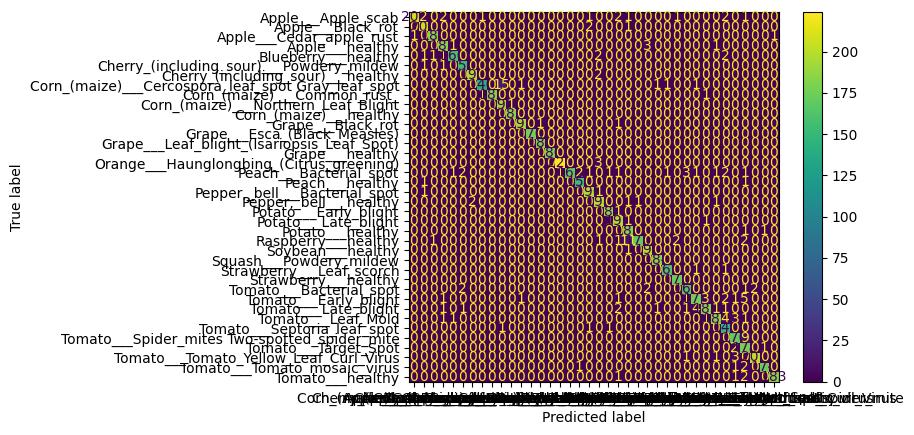

In [14]:
# Load your test dataset
test_ds = test_ds80

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision80_40e = precision_score(labels, predictions, average='micro')
recall80_40e = recall_score(labels, predictions, average='micro')
accuracy80_40e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision80_40e)
print("Recall:", recall80_40e)
print("Accuracy:", accuracy80_40e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [15]:
history_3_80 = model_dep.fit(
    train_ds80,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds80
)

Epoch 1/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.1593 - val_accuracy: 0.9660
Epoch 2/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.1090 - val_accuracy: 0.9769
Epoch 3/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.1324 - val_accuracy: 0.9685
Epoch 4/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.1214 - val_accuracy: 0.9755
Epoch 5/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.1117 - val_accuracy: 0.9755
Epoch 6/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.1346 - val_accuracy: 0.9665
Epoch 7/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.1695 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9764972391335127
Recall: 0.9764972391335127
Accuracy: 0.9764972391335127


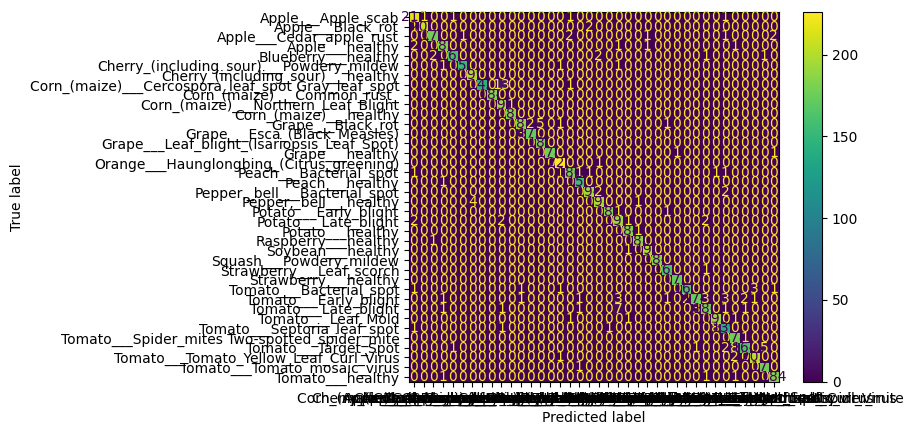

In [16]:
# Load your test dataset
test_ds = test_ds80

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision80_60e = precision_score(labels, predictions, average='micro')
recall80_60e = recall_score(labels, predictions, average='micro')
accuracy80_60e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision80_60e)
print("Recall:", recall80_60e)
print("Accuracy:", accuracy80_60e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [17]:
history_4_80 = model_dep.fit(
    train_ds80,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds80
)

Epoch 1/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0110 - accuracy: 0.9971 - val_loss: 0.1232 - val_accuracy: 0.9763
Epoch 2/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.1651 - val_accuracy: 0.9652
Epoch 3/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.1321 - val_accuracy: 0.9776
Epoch 4/20
1757/1757 [==============================] - 51s 29ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.1436 - val_accuracy: 0.9740
Epoch 5/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.1353 - val_accuracy: 0.9762
Epoch 6/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.1101 - val_accuracy: 0.9796
Epoch 7/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.1779 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9767804049270848
Recall: 0.9767804049270848
Accuracy: 0.9767804049270848


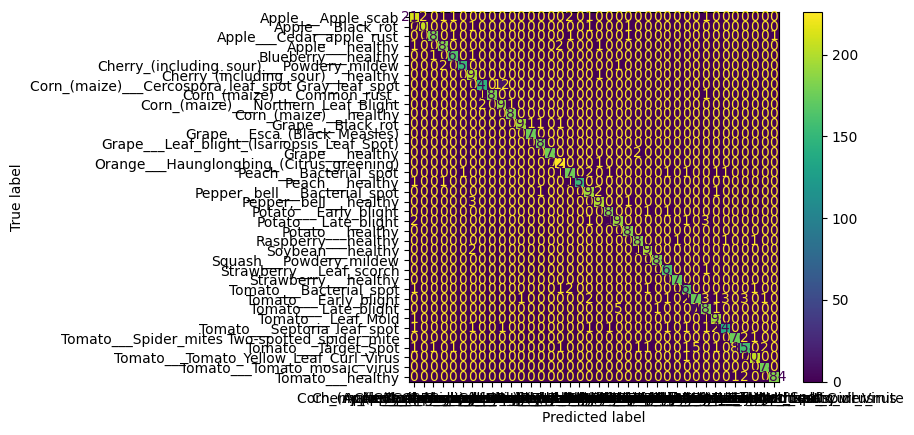

In [18]:
# Load your test dataset
test_ds = test_ds80

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision80_80e = precision_score(labels, predictions, average='micro')
recall80_80e = recall_score(labels, predictions, average='micro')
accuracy80_80e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision80_80e)
print("Recall:", recall80_80e)
print("Accuracy:", accuracy80_80e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [19]:
history_5_80 = model_dep.fit(
    train_ds80,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds80
)

Epoch 1/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.1076 - val_accuracy: 0.9805
Epoch 2/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0116 - accuracy: 0.9972 - val_loss: 0.2218 - val_accuracy: 0.9702
Epoch 3/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.1482 - val_accuracy: 0.9756
Epoch 4/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.1533 - val_accuracy: 0.9787
Epoch 5/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.1386 - val_accuracy: 0.9797
Epoch 6/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.1468 - val_accuracy: 0.9763
Epoch 7/20
1757/1757 [==============================] - 50s 29ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.1285 -

1/1 [==============================] - 0s 24ms/step
Precision: 0.9780546509981595
Recall: 0.9780546509981595
Accuracy: 0.9780546509981595


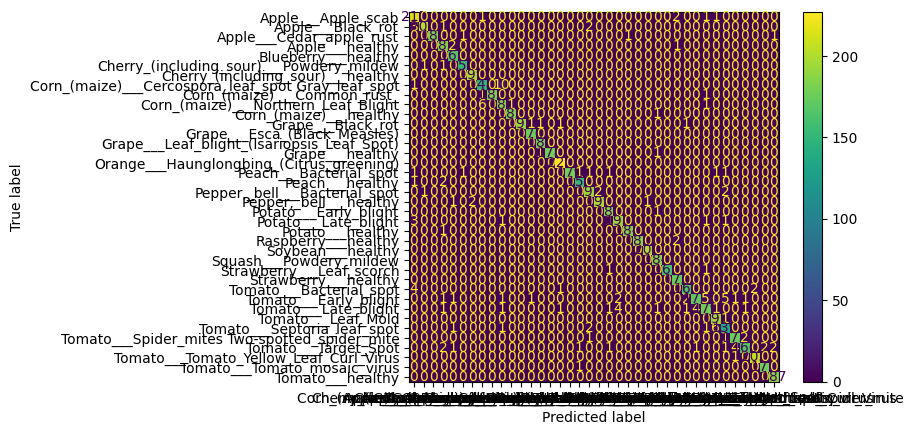

In [20]:
# Load your test dataset
test_ds = test_ds80

# Initialize lists to store true labels and predictions
labels = []
predictions = []

# Iterate over the test dataset to collect labels and predictions
for images, labels_batch in test_ds:
    predictions_batch = model_dep.predict(images)
    predictions_batch = np.argmax(predictions_batch, axis=1)
    labels.extend(labels_batch.numpy())
    predictions.extend(predictions_batch)

# Calculate precision, recall, and accuracy
precision80_100e = precision_score(labels, predictions, average='micro')
recall80_100e = recall_score(labels, predictions, average='micro')
accuracy80_100e = accuracy_score(labels, predictions)

# Display precision, recall, and accuracy
print("Precision:", precision80_100e)
print("Recall:", recall80_100e)
print("Accuracy:", accuracy80_100e)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.show()

In [23]:
model_dep.save("./Plant_Cadet.h5")

In [ ]:
**********************************************

In [2]:
precision40_20e = 0.9472786698877362
precision40_40e = 0.9483207806356876
precision40_60e = 0.9477523565913505
precision40_80e = 0.9469944578655677
precision40_100e = 0.9441997063142438

recall40_20e = 0.9472786698877362
recall40_40e = 0.9483207806356876
recall40_60e = 0.9477523565913505
recall40_80e = 0.9469944578655677
recall40_100e = 0.9441997063142438

accuracy40_20e = 0.9472786698877362
accuracy40_40e = 0.9483207806356876
accuracy40_60e = 0.9477523565913505
accuracy40_80e = 0.9469944578655677
accuracy40_100e = 0.9441997063142438

In [3]:
precision50_20e = 0.9443465408447501
precision50_40e = 0.9549201296117332
precision50_60e = 0.952418850548576
precision50_80e = 0.9405377749985788
precision50_100e = 0.955318060371781

recall50_20e = 0.9443465408447501
recall50_40e = 0.9549201296117332
recall50_60e = 0.952418850548576
recall50_80e = 0.9405377749985788
recall50_100e = 0.955318060371781

accuracy50_20e = 0.9443465408447501
accuracy50_40e = 0.9549201296117332
accuracy50_60e = 0.952418850548576
accuracy50_80e = 0.9405377749985788
accuracy50_100e = 0.955318060371781


In [4]:
precision60_20e = 0.9579987207732216
precision60_40e = 0.9631156278871438
precision60_60e = 0.9688010802359462
precision60_80e = 0.9723544879539479
precision60_100e = 0.9607703787932628

recall60_20e = 0.9579987207732216
recall60_40e = 0.9631156278871438
recall60_60e = 0.9688010802359462
recall60_80e = 0.9723544879539479
recall60_100e = 0.9607703787932628

accuracy60_20e = 0.9579987207732216
accuracy60_40e = 0.9631156278871438
accuracy60_60e = 0.9688010802359462
accuracy60_80e = 0.9723544879539479
accuracy60_100e = 0.9607703787932628

In [5]:
precision70_20e = 0.9707077388264197
precision70_40e = 0.9695738448455069
precision70_60e = 0.9691958801852026
precision70_80e = 0.9708967211565719
precision70_100e = 0.969668336010583

recall70_20e = 0.9707077388264197
recall70_40e = 0.9695738448455069
recall70_60e = 0.9691958801852026
recall70_80e = 0.9708967211565719
recall70_100e = 0.969668336010583

accuracy70_20e = 0.9707077388264197
accuracy70_40e = 0.9695738448455069
accuracy70_60e = 0.9691958801852026
accuracy70_80e = 0.9708967211565719
accuracy70_100e = 0.969668336010583

In [6]:
precision80_20e = 0.9704091745717117
precision80_40e = 0.9733824154042192
precision80_60e = 0.9764972391335127
precision80_80e = 0.9767804049270848
precision80_100e = 0.9780546509981595

recall80_20e = 0.9704091745717117
recall80_40e = 0.9733824154042192
recall80_60e = 0.9764972391335127
recall80_80e = 0.9767804049270848
recall80_100e = 0.9780546509981595

accuracy80_20e = 0.9704091745717117
accuracy80_40e = 0.9733824154042192
accuracy80_60e = 0.9764972391335127
accuracy80_80e = 0.9767804049270848
accuracy80_100e = 0.9780546509981595

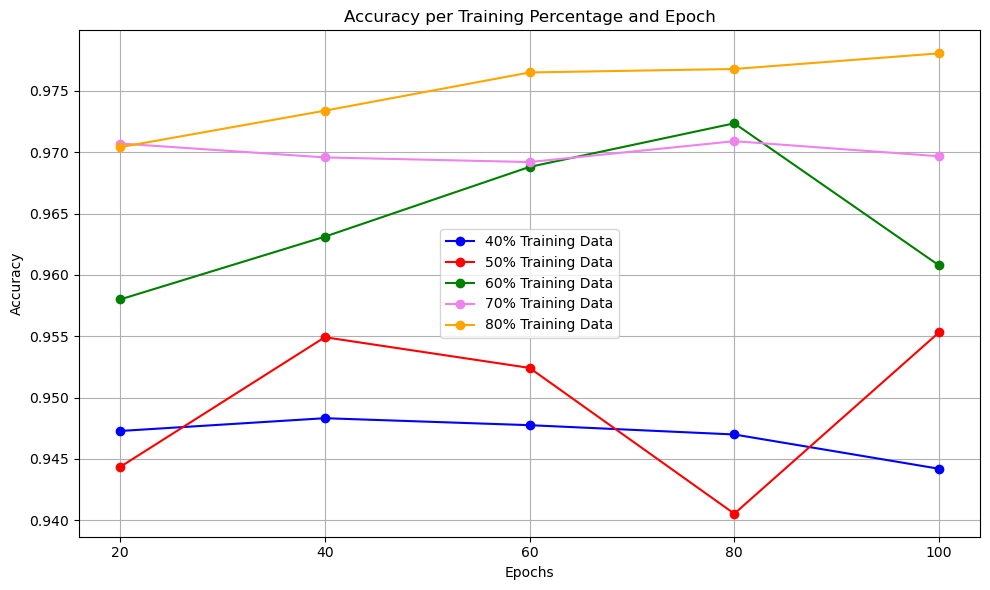

In [7]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy40_20e = 0.9472786698877362
accuracy40_40e = 0.9483207806356876
accuracy40_60e = 0.9477523565913505
accuracy40_80e = 0.9469944578655677
accuracy40_100e = 0.9441997063142438

accuracy50_20e = 0.9443465408447501
accuracy50_40e = 0.9549201296117332
accuracy50_60e = 0.952418850548576
accuracy50_80e = 0.9405377749985788
accuracy50_100e = 0.955318060371781

accuracy60_20e = 0.9579987207732216
accuracy60_40e = 0.9631156278871438
accuracy60_60e = 0.9688010802359462
accuracy60_80e = 0.9723544879539479
accuracy60_100e = 0.9607703787932628

accuracy70_20e = 0.9707077388264197
accuracy70_40e = 0.9695738448455069
accuracy70_60e = 0.9691958801852026
accuracy70_80e = 0.9708967211565719
accuracy70_100e = 0.969668336010583

accuracy80_20e = 0.9704091745717117
accuracy80_40e = 0.9733824154042192
accuracy80_60e = 0.9764972391335127
accuracy80_80e = 0.9767804049270848
accuracy80_100e = 0.9780546509981595

# Extracting accuracy values
acc_40 = [accuracy40_20e, accuracy40_40e, accuracy40_60e, accuracy40_80e, accuracy40_100e]
acc_50 = [accuracy50_20e, accuracy50_40e, accuracy50_60e, accuracy50_80e, accuracy50_100e]
acc_60 = [accuracy60_20e, accuracy60_40e, accuracy60_60e, accuracy60_80e, accuracy60_100e]
acc_70 = [accuracy70_20e, accuracy70_40e, accuracy70_60e, accuracy70_80e, accuracy70_100e]
acc_80 = [accuracy80_20e, accuracy80_40e, accuracy80_60e, accuracy80_80e, accuracy80_100e]

epochs = [20, 40, 60, 80, 100]
training_perc = [40, 50, 60, 70, 80]

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc_40, label='40% Training Data', color='blue', marker='o')
plt.plot(epochs, acc_50, label='50% Training Data', color='red', marker='o')
plt.plot(epochs, acc_60, label='60% Training Data', color='green', marker='o')
plt.plot(epochs, acc_70, label='70% Training Data', color='violet', marker='o')
plt.plot(epochs, acc_80, label='80% Training Data', color='orange', marker='o')

plt.legend()
plt.title('Accuracy per Training Percentage and Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.tight_layout()
plt.show()


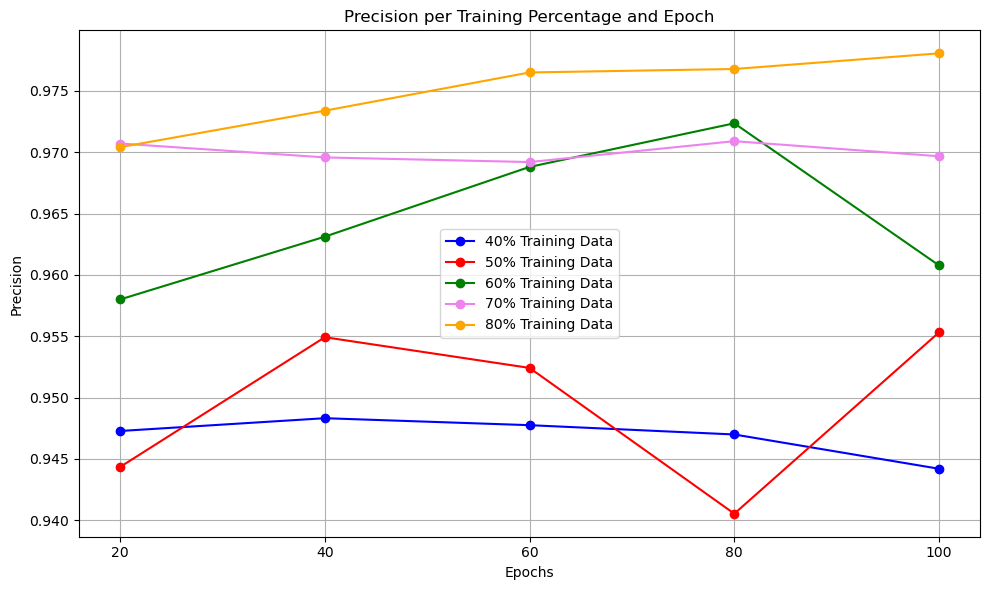

In [8]:
import matplotlib.pyplot as plt

# Precision values
precision40_20e = 0.9472786698877362
precision40_40e = 0.9483207806356876
precision40_60e = 0.9477523565913505
precision40_80e = 0.9469944578655677
precision40_100e = 0.9441997063142438

precision50_20e = 0.9443465408447501
precision50_40e = 0.9549201296117332
precision50_60e = 0.952418850548576
precision50_80e = 0.9405377749985788
precision50_100e = 0.955318060371781

precision60_20e = 0.9579987207732216
precision60_40e = 0.9631156278871438
precision60_60e = 0.9688010802359462
precision60_80e = 0.9723544879539479
precision60_100e = 0.9607703787932628

precision70_20e = 0.9707077388264197
precision70_40e = 0.9695738448455069
precision70_60e = 0.9691958801852026
precision70_80e = 0.9708967211565719
precision70_100e = 0.969668336010583

precision80_20e = 0.9704091745717117
precision80_40e = 0.9733824154042192
precision80_60e = 0.9764972391335127
precision80_80e = 0.9767804049270848
precision80_100e = 0.9780546509981595

# Extracting precision values
prec_40 = [precision40_20e, precision40_40e, precision40_60e, precision40_80e, precision40_100e]
prec_50 = [precision50_20e, precision50_40e, precision50_60e, precision50_80e, precision50_100e]
prec_60 = [precision60_20e, precision60_40e, precision60_60e, precision60_80e, precision60_100e]
prec_70 = [precision70_20e, precision70_40e, precision70_60e, precision70_80e, precision70_100e]
prec_80 = [precision80_20e, precision80_40e, precision80_60e, precision80_80e, precision80_100e]

epochs = [20, 40, 60, 80, 100]
training_perc = [40, 50, 60, 70, 80]

# Plotting precision
plt.figure(figsize=(10, 6))
plt.plot(epochs, prec_40, label='40% Training Data', color='blue', marker='o')
plt.plot(epochs, prec_50, label='50% Training Data', color='red', marker='o')
plt.plot(epochs, prec_60, label='60% Training Data', color='green', marker='o')
plt.plot(epochs, prec_70, label='70% Training Data', color='violet', marker='o')
plt.plot(epochs, prec_80, label='80% Training Data', color='orange', marker='o')

plt.legend()
plt.title('Precision per Training Percentage and Epoch')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.xticks(epochs)
plt.grid(True)
plt.tight_layout()
plt.show()


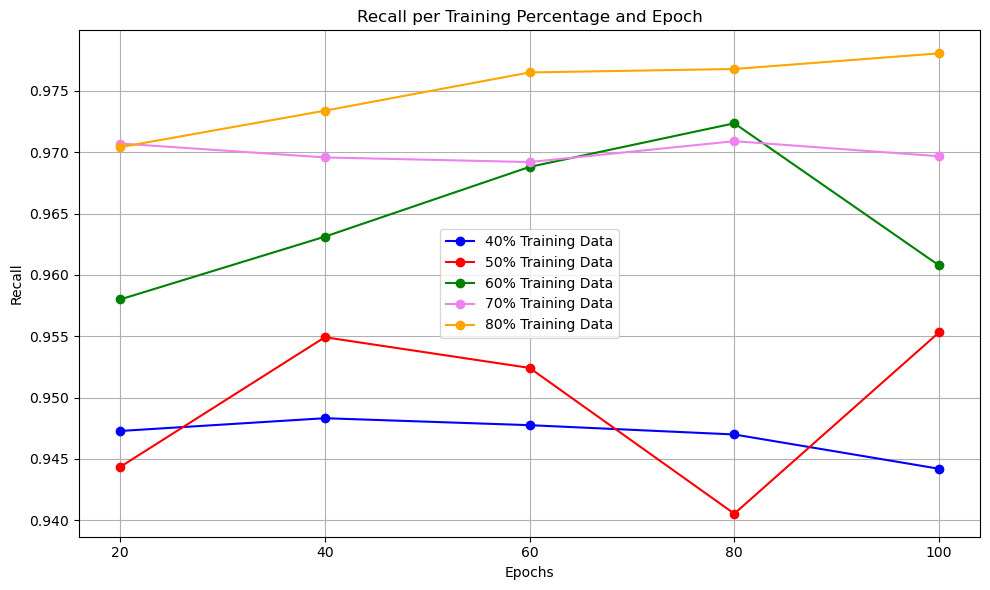

In [9]:
import matplotlib.pyplot as plt

# Recall values
recall40_20e = 0.9472786698877362
recall40_40e = 0.9483207806356876
recall40_60e = 0.9477523565913505
recall40_80e = 0.9469944578655677
recall40_100e = 0.9441997063142438

recall50_20e = 0.9443465408447501
recall50_40e = 0.9549201296117332
recall50_60e = 0.952418850548576
recall50_80e = 0.9405377749985788
recall50_100e = 0.955318060371781

recall60_20e = 0.9579987207732216
recall60_40e = 0.9631156278871438
recall60_60e = 0.9688010802359462
recall60_80e = 0.9723544879539479
recall60_100e = 0.9607703787932628

recall70_20e = 0.9707077388264197
recall70_40e = 0.9695738448455069
recall70_60e = 0.9691958801852026
recall70_80e = 0.9708967211565719
recall70_100e = 0.969668336010583

recall80_20e = 0.9704091745717117
recall80_40e = 0.9733824154042192
recall80_60e = 0.9764972391335127
recall80_80e = 0.9767804049270848
recall80_100e = 0.9780546509981595

# Extracting recall values
recall_40 = [recall40_20e, recall40_40e, recall40_60e, recall40_80e, recall40_100e]
recall_50 = [recall50_20e, recall50_40e, recall50_60e, recall50_80e, recall50_100e]
recall_60 = [recall60_20e, recall60_40e, recall60_60e, recall60_80e, recall60_100e]
recall_70 = [recall70_20e, recall70_40e, recall70_60e, recall70_80e, recall70_100e]
recall_80 = [recall80_20e, recall80_40e, recall80_60e, recall80_80e, recall80_100e]

epochs = [20, 40, 60, 80, 100]
training_perc = [40, 50, 60, 70, 80]

# Plotting recall
plt.figure(figsize=(10, 6))
plt.plot(epochs, recall_40, label='40% Training Data', color='blue', marker='o')
plt.plot(epochs, recall_50, label='50% Training Data', color='red', marker='o')
plt.plot(epochs, recall_60, label='60% Training Data', color='green', marker='o')
plt.plot(epochs, recall_70, label='70% Training Data', color='violet', marker='o')
plt.plot(epochs, recall_80, label='80% Training Data', color='orange', marker='o')

plt.legend()
plt.title('Recall per Training Percentage and Epoch')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.xticks(epochs)
plt.grid(True)
plt.tight_layout()
plt.show()


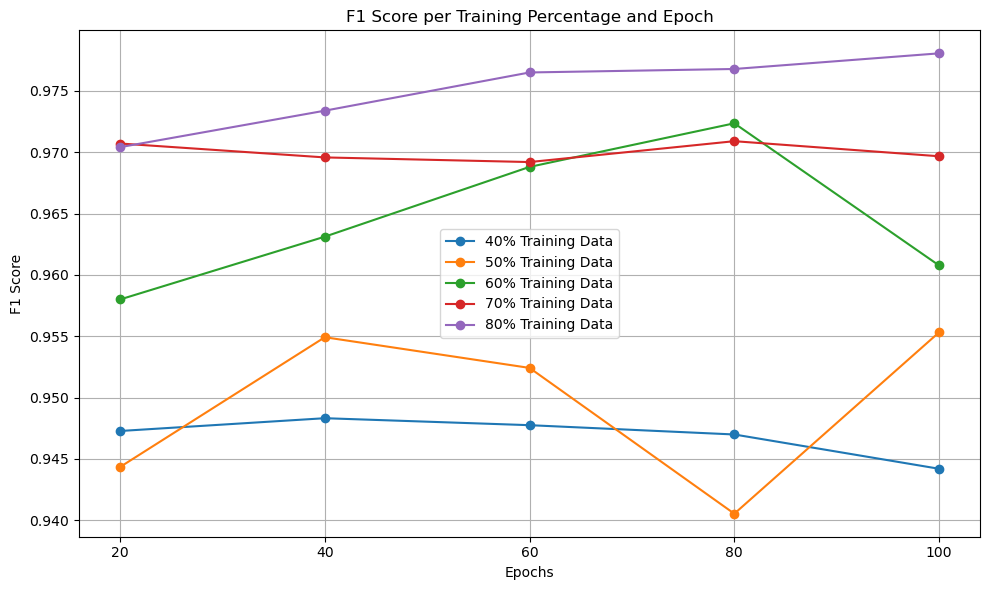

In [13]:
import matplotlib.pyplot as plt

# Precision values
precision_values = {
    "40_20": 0.9472786698877362,
    "40_40": 0.9483207806356876,
    "40_60": 0.9477523565913505,
    "40_80": 0.9469944578655677,
    "40_100": 0.9441997063142438,
    "50_20": 0.9443465408447501,
    "50_40": 0.9549201296117332,
    "50_60": 0.952418850548576,
    "50_80": 0.9405377749985788,
    "50_100": 0.955318060371781,
    "60_20": 0.9579987207732216,
    "60_40": 0.9631156278871438,
    "60_60": 0.9688010802359462,
    "60_80": 0.9723544879539479,
    "60_100": 0.9607703787932628,
    "70_20": 0.9707077388264197,
    "70_40": 0.9695738448455069,
    "70_60": 0.9691958801852026,
    "70_80": 0.9708967211565719,
    "70_100": 0.969668336010583,
    "80_20": 0.9704091745717117,
    "80_40": 0.9733824154042192,
    "80_60": 0.9764972391335127,
    "80_80": 0.9767804049270848,
    "80_100": 0.9780546509981595
}

# Recall values
recall_values = {
    "40_20": 0.9472786698877362,
    "40_40": 0.9483207806356876,
    "40_60": 0.9477523565913505,
    "40_80": 0.9469944578655677,
    "40_100": 0.9441997063142438,
    "50_20": 0.9443465408447501,
    "50_40": 0.9549201296117332,
    "50_60": 0.952418850548576,
    "50_80": 0.9405377749985788,
    "50_100": 0.955318060371781,
    "60_20": 0.9579987207732216,
    "60_40": 0.9631156278871438,
    "60_60": 0.9688010802359462,
    "60_80": 0.9723544879539479,
    "60_100": 0.9607703787932628,
    "70_20": 0.9707077388264197,
    "70_40": 0.9695738448455069,
    "70_60": 0.9691958801852026,
    "70_80": 0.9708967211565719,
    "70_100": 0.969668336010583,
    "80_20": 0.9704091745717117,
    "80_40": 0.9733824154042192,
    "80_60": 0.9764972391335127,
    "80_80": 0.9767804049270848,
    "80_100": 0.9780546509981595
}

# Calculate F1 scores
f1_scores = {}
for key in precision_values:
    precision = precision_values[key]
    recall = recall_values[key]
    f1_scores[key] = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Extracting values for plotting
epochs = [20, 40, 60, 80, 100]
training_percentages = [40, 50, 60, 70, 80]
f1_values = [[f1_scores[f"{perc}_{epoch}"] for epoch in epochs] for perc in training_percentages]

# Plotting F1 scores
plt.figure(figsize=(10, 6))
for i, perc in enumerate(training_percentages):
    plt.plot(epochs, f1_values[i], label=f'{perc}% Training Data', marker='o')

plt.legend()
plt.title('F1 Score per Training Percentage and Epoch')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.xticks(epochs)
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
accuracy80_20e = 0.9704091745717117
accuracy80_40e = 0.9733824154042192
accuracy80_60e = 0.9764972391335127
accuracy80_80e = 0.9767804049270848
accuracy80_100e = 0.9780546509981595

precision80_20e = 0.9704091745717117
precision80_40e = 0.9733824154042192
precision80_60e = 0.9764972391335127
precision80_80e = 0.9767804049270848
precision80_100e = 0.9780546509981595

recall80_20e = 0.9704091745717117
recall80_40e = 0.9733824154042192
recall80_60e = 0.9764972391335127
recall80_80e = 0.9767804049270848
recall80_100e = 0.9780546509981595

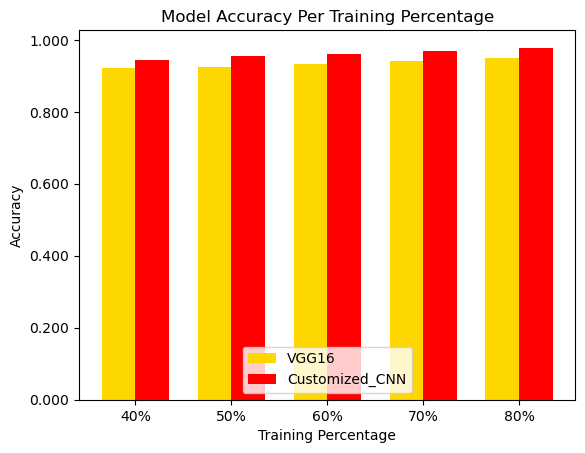

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter

acc_data = {
    "Customized_CNN": [0.9441997063142438, 
                       0.955318060371781,
                       0.9607703787932628,
                       0.969668336010583,
                       0.9780546509981595],
    "VGG16": [0.9203812479972839, 
              0.9232126474380493, 
              0.9341543316841125, 
              0.9422492384910583, 
              0.9489269351959229],
}

colors = ["#FFD700", "#FF0000"]

fig, ax = plt.subplots()

bar_width = 0.35
num_models = len(acc_data)
index = np.arange(len(acc_data["Customized_CNN"]))  # Assuming all models have the same number of data points

# Reversing the order of iteration over acc_data dictionary
for i, (model, data) in enumerate(reversed(acc_data.items())):
    ax.bar(
        [pos + i * bar_width for pos in index],  # X-axis positions
        data,  # Heights
        bar_width,
        label=model,
        color=colors[i % len(colors)],
    )

ax.set_xlabel("Training Percentage")
ax.set_ylabel("Accuracy")

# Set the position of x-axis ticks
ax.set_xticks([pos + ((num_models - 1) / 2) * bar_width for pos in index])
ax.set_xticklabels(["40%", "50%", "60%", "70%", "80%"])

# Align the labels to the center
plt.xticks(ha='center')

ax.set_title("Model Accuracy Per Training Percentage")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 0))

# Customizing y-axis ticks with three decimals using StrMethodFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.3f}'))

plt.show()

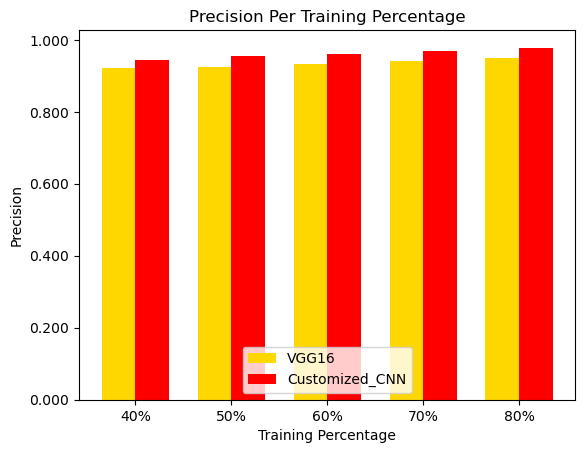

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter

acc_data = {
    "Customized_CNN": [0.9441997063142438, 
                       0.955318060371781,
                       0.9607703787932628,
                       0.969668336010583,
                       0.9780546509981595],
    "VGG16": [0.9203812479972839, 
              0.9232126474380493, 
              0.9341543316841125, 
              0.9422492384910583, 
              0.9489269351959229],
}

colors = ["#FFD700", "#FF0000"]

fig, ax = plt.subplots()

bar_width = 0.35
num_models = len(acc_data)
index = np.arange(len(acc_data["Customized_CNN"]))  # Assuming all models have the same number of data points

# Reversing the order of iteration over acc_data dictionary
for i, (model, data) in enumerate(reversed(acc_data.items())):
    ax.bar(
        [pos + i * bar_width for pos in index],  # X-axis positions
        data,  # Heights
        bar_width,
        label=model,
        color=colors[i % len(colors)],
    )

ax.set_xlabel("Training Percentage")
ax.set_ylabel("Precision")

# Set the position of x-axis ticks
ax.set_xticks([pos + ((num_models - 1) / 2) * bar_width for pos in index])
ax.set_xticklabels(["40%", "50%", "60%", "70%", "80%"])

# Align the labels to the center
plt.xticks(ha='center')

ax.set_title("Precision Per Training Percentage")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 0))

# Customizing y-axis ticks with three decimals using StrMethodFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.3f}'))

plt.show()

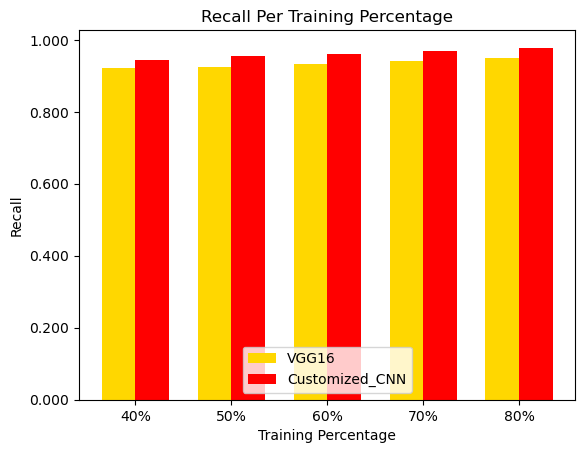

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter

acc_data = {
    "Customized_CNN": [0.9441997063142438, 
                       0.955318060371781,
                       0.9607703787932628,
                       0.969668336010583,
                       0.9780546509981595],
    "VGG16": [0.9203812479972839, 
              0.9232126474380493, 
              0.9341543316841125, 
              0.9422492384910583, 
              0.9489269351959229],
}

colors = ["#FFD700", "#FF0000"]

fig, ax = plt.subplots()

bar_width = 0.35
num_models = len(acc_data)
index = np.arange(len(acc_data["Customized_CNN"]))  # Assuming all models have the same number of data points

# Reversing the order of iteration over acc_data dictionary
for i, (model, data) in enumerate(reversed(acc_data.items())):
    ax.bar(
        [pos + i * bar_width for pos in index],  # X-axis positions
        data,  # Heights
        bar_width,
        label=model,
        color=colors[i % len(colors)],
    )

ax.set_xlabel("Training Percentage")
ax.set_ylabel("Recall")

# Set the position of x-axis ticks
ax.set_xticks([pos + ((num_models - 1) / 2) * bar_width for pos in index])
ax.set_xticklabels(["40%", "50%", "60%", "70%", "80%"])

# Align the labels to the center
plt.xticks(ha='center')

ax.set_title("Recall Per Training Percentage")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 0))

# Customizing y-axis ticks with three decimals using StrMethodFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.3f}'))

plt.show()

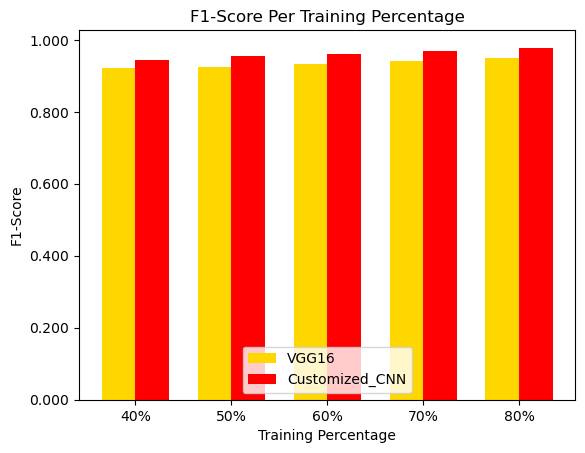

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter

acc_data = {
    "Customized_CNN": [0.9441997063142438, 
                       0.955318060371781,
                       0.9607703787932628,
                       0.969668336010583,
                       0.9780546509981595],
    "VGG16": [0.9203812479972839, 
              0.9232126474380493, 
              0.9341543316841125, 
              0.9422492384910583, 
              0.9489269351959229],
}

colors = ["#FFD700", "#FF0000"]

fig, ax = plt.subplots()

bar_width = 0.35
num_models = len(acc_data)
index = np.arange(len(acc_data["Customized_CNN"]))  # Assuming all models have the same number of data points

# Reversing the order of iteration over acc_data dictionary
for i, (model, data) in enumerate(reversed(acc_data.items())):
    ax.bar(
        [pos + i * bar_width for pos in index],  # X-axis positions
        data,  # Heights
        bar_width,
        label=model,
        color=colors[i % len(colors)],
    )

ax.set_xlabel("Training Percentage")
ax.set_ylabel("F1-Score")

# Set the position of x-axis ticks
ax.set_xticks([pos + ((num_models - 1) / 2) * bar_width for pos in index])
ax.set_xticklabels(["40%", "50%", "60%", "70%", "80%"])

# Align the labels to the center
plt.xticks(ha='center')

ax.set_title("F1-Score Per Training Percentage")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 0))

# Customizing y-axis ticks with three decimals using StrMethodFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.3f}'))

plt.show()